In [17]:
import dill
import numpy as np
import pandas as pd
from datetime import datetime as dt, timedelta
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV,ShuffleSplit
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler, Normalizer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from IPython.display import display, HTML
%matplotlib inline
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


import ModelEvaluation as me

# Analysis, 15k unique users

In [2]:
DF = pd.read_pickle('../data/Customer_Dataset_15k_Baseline.pkl')

In [3]:
X_features = ['REF_DATE_MONTH', 'REF_DATE_DAY', 'REF_DATE_YEAR', 'NUM_PAST_ORDERS',
 'SUM_PAST_SHIPPED_SOLD_AMT', 'AVG_PAST_SHIPPED_SOLD_AMT', 'STDDEV_PAST_SHIPPED_SOLD_AMT',
 'VAR_PAST_SHIPPED_SOLD_AMT', 'SUM_PAST_DISCOUNT', 'AVG_PAST_DISCOUNT',
 'STDDEV_PAST_DISCOUNT', 'VAR_PAST_DISCOUNT', 'HAS_CORE', 'HAS_PURE_JILL',
 'HAS_WEAREVER', 'HAS_FP', 'HAS_SP', 'HAS_CASH', 'HAS_CK', 'HAS_DEBIT',
 'HAS_DISC', 'HAS_JJC', 'HAS_MC', 'HAS_OTHER_PAYTYPE', 'HAS_VISA',
 'HAS_D', 'HAS_R', 'HAS_COTTON/COTTON_BL', 'HAS_LINEN/LINEN_BL', 'HAS_OTHER_FABRIC',
 'HAS_SYNTHETIC/SYN_BLEND', '%_IN_CORE', '%_IN_PURE_JILL', '%_IN_WEAREVER',
 '%_IN_FP', '%_IN_SP', '%_IN_CASH', '%_IN_CK', '%_IN_DEBIT', '%_IN_DISC', '%_IN_JJC',
 '%_IN_MC', '%_IN_OTHER_PAYTYPE', '%_IN_VISA', '%_IN_D', '%_IN_R', '%_IN_COTTON/COTTON_BL',
 '%_IN_LINEN/LINEN_BL', '%_IN_OTHER_FABRIC', '%_IN_SYNTHETIC/SYN_BLEND']
dependent = 'BOUGHT_PANTS'

print 'Input features: \n%s\n' % X_features
print 'Dependent feature: %s\n\n' % dependent

Input features: 
['REF_DATE_MONTH', 'REF_DATE_DAY', 'REF_DATE_YEAR', 'NUM_PAST_ORDERS', 'SUM_PAST_SHIPPED_SOLD_AMT', 'AVG_PAST_SHIPPED_SOLD_AMT', 'STDDEV_PAST_SHIPPED_SOLD_AMT', 'VAR_PAST_SHIPPED_SOLD_AMT', 'SUM_PAST_DISCOUNT', 'AVG_PAST_DISCOUNT', 'STDDEV_PAST_DISCOUNT', 'VAR_PAST_DISCOUNT', 'HAS_CORE', 'HAS_PURE_JILL', 'HAS_WEAREVER', 'HAS_FP', 'HAS_SP', 'HAS_CASH', 'HAS_CK', 'HAS_DEBIT', 'HAS_DISC', 'HAS_JJC', 'HAS_MC', 'HAS_OTHER_PAYTYPE', 'HAS_VISA', 'HAS_D', 'HAS_R', 'HAS_COTTON/COTTON_BL', 'HAS_LINEN/LINEN_BL', 'HAS_OTHER_FABRIC', 'HAS_SYNTHETIC/SYN_BLEND', '%_IN_CORE', '%_IN_PURE_JILL', '%_IN_WEAREVER', '%_IN_FP', '%_IN_SP', '%_IN_CASH', '%_IN_CK', '%_IN_DEBIT', '%_IN_DISC', '%_IN_JJC', '%_IN_MC', '%_IN_OTHER_PAYTYPE', '%_IN_VISA', '%_IN_D', '%_IN_R', '%_IN_COTTON/COTTON_BL', '%_IN_LINEN/LINEN_BL', '%_IN_OTHER_FABRIC', '%_IN_SYNTHETIC/SYN_BLEND']

Dependent feature: BOUGHT_PANTS




In [4]:
print 'Building Train and Test...'
limit_num = int(round(DF.ILINK.unique().shape[0] * .8))
train = DF.ILINK.unique().tolist()[:limit_num]
test = DF.ILINK.unique().tolist()[limit_num:]
DFTrain = DF[DF.ILINK.isin(train)]
DFTest = DF[DF.ILINK.isin(test)]

X_train = DFTrain[X_features]
y_train = DFTrain[dependent]

X_test = DFTest[X_features]
y_test = DFTest[dependent]

print 'For test set,'
print 'Number of negatives (0): %d '  % y_test.value_counts()[0]
print 'Number of positives (1): %d '  % y_test.value_counts()[1]

Building Train and Test...
For test set,
Number of negatives (0): 45238 
Number of positives (1): 54131 


In [20]:
grid = pd.read_pickle('../models/RFC_PantsVsAll_BaselineV1_15k.pkl')
#with open('../models/RFC_PantsVsAll_BaselineV1_15k.pkl') as infile:
#    grid = dill.load(infile)

Validation Score Accuracy: 99.72% +/- 0.02%
Train Score Accuracy: 99.98% +/- 0.00%


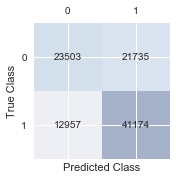

Accuracy: 0.65
Missclassification Rate: 0.35
(1) Positive Rate(Recall): 0.76
(0) Positive Rate(Sensitivity): 0.52
Precision(proportion of predicted (1)): 0.65
Specificity(proportion of predicted (0): 0.64


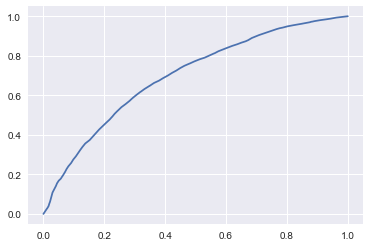

AUC(Area Under Curve) score: 0.698431


In [21]:
me.ModelEvalClassifier(grid,X_test,y_test)

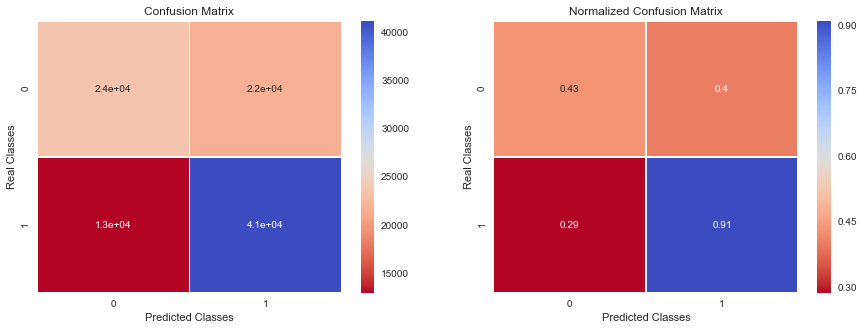

---Classification Report---
             precision    recall  f1-score   support

          0       0.64      0.52      0.58     45238
          1       0.65      0.76      0.70     54131

avg / total       0.65      0.65      0.65     99369



In [22]:
pred = grid.predict(X_test)
y_test_0 = y_test.value_counts()[0]
y_test_1 = y_test.value_counts()[1]
me.PlotConfusionMatrix(y_test,pred,y_test_1,y_test_0)